Lesson 02: Visualizing Data With Matplotlib
===============

Matplotlib is the most commonly used Python package for graphing and data visualization. In this tutorial, we'll use matplotlib to generate three types of charts from the Brigham-Grette et al. (2014) data:
1. A time series strip chart similar to the bottom three panels of Figure 2
<img src="./images/Brigham-Grette2014_Fig_2.png">
2. A scatter plot of precipitation vs. temperature
3. A histogram of tree and shrub pollen percentages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pandas as pd
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [2]:
elgy=pd.read_csv('elgygytgyn2013_reconstruction.csv',skiprows=12)

<Figure size 432x288 with 0 Axes>

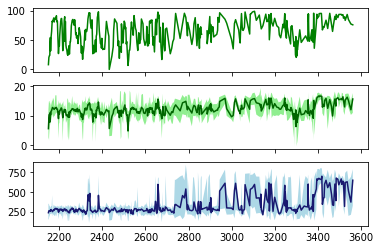

In [3]:
# Set up figure as 6 in x 4 in space, with 3 rows of subplots aligned in 1 column, sharing x axes
plt.figure(figsize=[6, 4])
f,ax = plt.subplots(3,1, sharex=True)

# Plot trees and shrubs data as a green line on top subplot
Handle_G1 = ax[0].plot(elgy['Age [ka BP]'],elgy['Trees & Shrubs [%]'],'g-')

# Plot temperature as a dark green line on second subplot, with a green area around it between min and max
Handle_H1 = ax[1].plot(elgy['Age [ka BP]'],elgy['Mean Temperature, warmest month [deg C]'],'-',c='darkgreen')
Handle_H2 = ax[1].fill_between(elgy['Age [ka BP]'],elgy['Minimum Mean Temperature, warmest month [deg C]'],
                               elgy['Maximum Mean Temperature, warmest month [deg C]'],facecolor='lightgreen')

# Plot precipitation as a dark blue line on bottom subplot, with a blue area around it between min and max
Handle_I1 = ax[2].plot(elgy['Age [ka BP]'],elgy['Precipitation, annual mean [mm]'],'-',c='midnightblue')
Handle_I2 = ax[2].fill_between(elgy['Age [ka BP]'],elgy['Minimum Precipitation, annual mean [mm]'],
                               elgy['Maximum Precipitation, annual mean [mm]'],facecolor='lightblue')



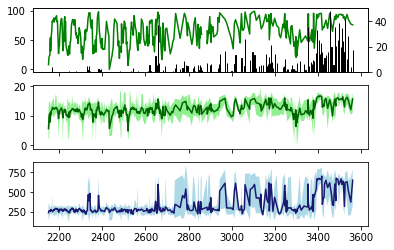

In [4]:
ax=np.append(ax,ax[0].twinx())
Handle_G2 = ax[3].bar(elgy['Age [ka BP]'],elgy['Picea [%] '],facecolor='k',edgecolor='k')
f

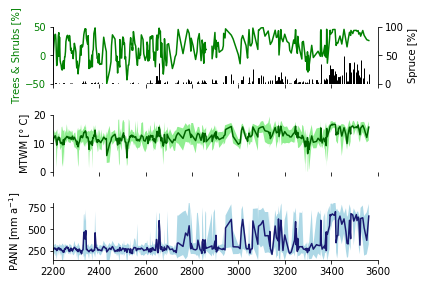

In [5]:
ax[0].set_xlim([2200,3600])
ax[0].set_ylim([0,100])
ax[1].set_ylim([0,20])
ax[2].set_ylim([150,800])
ax[3].set_ylim([0,100])
for i, a in enumerate(ax):
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_visible(False)
ax[2].spines["bottom"].set_visible(True)
ax[3].spines["right"].set_visible(True)

ax[0].set_ylabel('Trees & Shrubs [%]',color='green')
ax[1].set_ylabel('MTWM [\N{DEGREE SIGN} C]')
ax[2].set_ylabel('PANN [mm a$^{-1}$]')
ax[3].set_ylabel('Spruce [%]')
ax[0].set_yticklabels(ax[0].get_yticklabels(),color='green')
#mpl.rcParams['text.usetex'] = False

f.tight_layout()
f

In [7]:
f.savefig('output_1.png')

<Figure size 288x288 with 0 Axes>

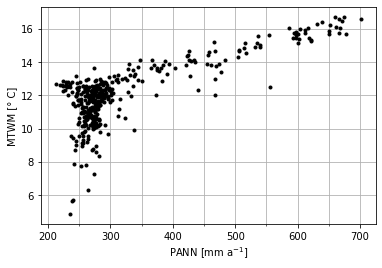

In [17]:
# Set up figure as 4 in x 4 in space, with a single plot
plt.figure(figsize=[4, 4])
f,ax = plt.subplots(1,1)

ax.plot(elgy['Precipitation, annual mean [mm]'],elgy['Mean Temperature, warmest month [deg C]'],'k.')
ax.set_xlabel('PANN [mm a$^{-1}$]')
ax.set_ylabel('MTWM [\N{DEGREE SIGN} C]')
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.grid(True,which='both')


Text(0, 0.5, 'Frequency')

<Figure size 288x288 with 0 Axes>

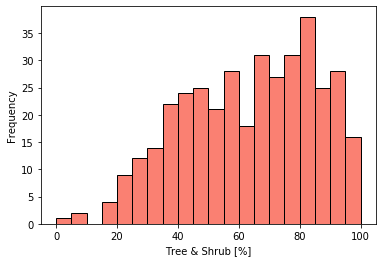

In [29]:
# Set up figure as 4 in x 4 in space, with a single plot
plt.figure(figsize=[4, 4])
f,ax = plt.subplots(1,1)

ax.hist(elgy['Trees & Shrubs [%]'],bins=np.linspace(0,100,21),facecolor='salmon',edgecolor='#000000')
ax.set_xlabel('Tree & Shrub [%]')
ax.set_ylabel('Frequency')
